In [1]:
import sys
sys.path.append("../utils")


from TextPreProcess import *

import pandas as pd
from sklearn.pipeline import Pipeline 
import matplotlib.pyplot as plt
import seaborn as sns

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC

import warnings
warnings.filterwarnings("ignore")



In [149]:
class ConstructModel:

    def __init__(self, steps, X, y, fit_on="train"):

        steps = [(str(i), steps[i]) for i in range(len(steps))]
        self.pipe = Pipeline(steps)
        self.X = X
        self.y = y
        
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, train_size=0.8, random_state=42)

        self.fit(on=fit_on)

    def fit(self, on="train"):
        if on == "train":
            self.pipe.fit(self.X_train, self.y_train)
        elif on == "test":
            self.pipe.fit(self.X_test, self.y_test)
        elif on == "all":
            self.pipe.fit(self.X, self.y)

    def get_score(self):
        train_score = self.pipe.score(X_train, y_train)
        test_score = self.pipe.score(X_test, y_test)
        print("Train Score:\t", train_score)
        print("Test Score:\t", test_score)

    def get_confusion_matrix(self, on="test"):
        cm = ConfusionMatrix(self.pipe)
        if on =="test": 
            cm.score(self.X_test, self.y_test)
        elif on == "train":
            cm.score(self.X_train, self.y_train)
        elif on == "all":
            cm.score(self.X, self.y)
        
        # graph the confusion matrix with yellowbrick
        cm.poof()

    def get_roc(self, on="test"):
        
        visualizer = ROCAUC(self.pipe)
        if on =="test": 
            visualizer.score(self.X_test, self.y_test)
        elif on == "train":
            visualizer.score(self.X_train, self.y_train)
        elif on == "all": 
            visualizer.score(self.X, self.y)
        
        visualizer.poof()    
    
    

# TEST

In [70]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [44]:
with open('../data/interim/text_target.pkl', 'rb') as f:
    text_target = pickle.load(f)

In [62]:
X = text_target.cleaned_text
y = text_target.target

In [153]:
vec = TfidfVectorizer()
lr = LogisticRegression(random_state=42)
nb = MultinomialNB()

lr_pipe = ConstructModel([vec, lr], X, y, fit_on="train")

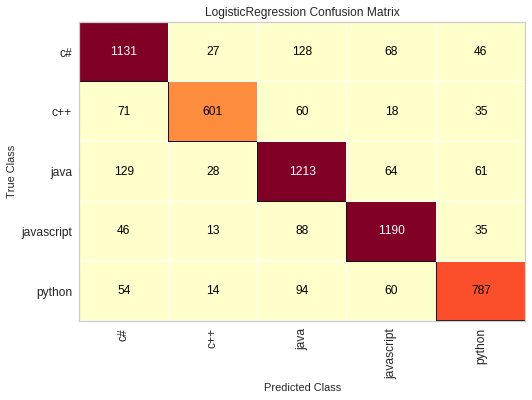

In [156]:
lr_pipe.get_confusion_matrix()

In [72]:
nb_pipe.get_score()

Train Score:	 0.8085475021657522
Test Score:	 0.7516911400758951


In [3]:
tpp = TextPreProcessor()